First steps should be clean dataframes with columns ‘station, date, time, entries, and exits’ for each plot we plan to make

In [101]:
from collections import defaultdict
from dateutil.parser import parse
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

In [102]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [103]:
def read_mta(file_nums):
    path ='http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    allFiles = []
    for i in file_nums:
        allFiles.append(path + i + ".txt")
    df_list = [pd.read_csv(file) for file in allFiles]
    df = pd.concat(df_list)
    df.columns = df.columns.str.strip()
    return df

In [105]:
# march data
df = read_mta(['170325', '170318', '170311', '170304'])

In [106]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [190]:
# remove duplicates
df = df[df.DESC != 'RECOVR AUD']
df = df[df.TIME != '04:01:13']
# Sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,02/25/2017,03:00:00,1
517927,R143,R032,02-03-01,TIMES SQ-42 ST,03/10/2017,23:00:00,1
517918,R143,R032,02-03-01,TIMES SQ-42 ST,03/09/2017,11:00:00,1
517919,R143,R032,02-03-01,TIMES SQ-42 ST,03/09/2017,15:00:00,1
517920,R143,R032,02-03-01,TIMES SQ-42 ST,03/09/2017,19:00:00,1


In [191]:
# this is at a turnstile level
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
DATETIME,,,,,,,,,,,
2017-03-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,00:00:00,REGULAR,6095917,2065975
2017-03-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,04:00:00,REGULAR,6095980,2065977
2017-03-18 04:01:13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,04:01:13,REGULAR,6095980,2065977
2017-03-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,08:00:00,REGULAR,6096012,2066004
2017-03-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,12:00:00,REGULAR,6096165,2066103


In [192]:
df['DATETIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME)

In [193]:
df = df.set_index(['DATETIME'])

In [194]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
DATETIME,,,,,,,,,,,
2017-03-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,00:00:00,REGULAR,6095917,2065975
2017-03-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,04:00:00,REGULAR,6095980,2065977
2017-03-18 04:01:13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,04:01:13,REGULAR,6095980,2065977
2017-03-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,08:00:00,REGULAR,6096012,2066004
2017-03-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,12:00:00,REGULAR,6096165,2066103


In [113]:
# filter dataset to 4am to noon
# subtract max from min for each turnstile to get exits
# add up total morning exits per station

In [195]:
morning = df.between_time('04:00:00', '12:00:00')

In [165]:
morning.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
DATETIME,,,,,,,,,,,
2017-03-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,04:00:00,REGULAR,6095980,2065977
2017-03-18 04:01:13,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,04:01:13,REGULAR,6095980,2065977
2017-03-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,08:00:00,REGULAR,6096012,2066004
2017-03-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,12:00:00,REGULAR,6096165,2066103
2017-03-19 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2017,04:00:00,REGULAR,6097250,2066240


In [196]:
morning_turn = (morning.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['EXITS'].max()\
           -morning.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'])['EXITS'].min()).reset_index()

In [201]:
# oddly high value for 47-50
morning_turn.loc[morning_turn['STATION'] == '47-50 STS ROCK']['EXITS'].sort_values(ascending = True).tail(10)

60298    2884
60360    2892
60327    2892
60332    2895
60325    2943
60330    2947
60361    2971
60333    2994
60354    3312
60326    3471
Name: EXITS, dtype: int64

In [202]:
#explore outliers
morning_turn['EXITS'].describe()

count    130882.000
mean        231.356
std         373.319
min           0.000
25%          17.000
50%          96.000
75%         276.000
max        5803.000
Name: EXITS, dtype: float64

In [203]:
morning_turn['EXITS'].sort_values(ascending = True).tail(30)

101356    4042
101358    4071
101357    4074
101313    4104
101869    4155
101307    4165
101315    4179
101355    4218
101868    4230
101870    4267
101866    4284
101859    4353
          ... 
101312    4727
101351    4790
73771     5207
101562    5384
101551    5484
101560    5604
101552    5625
101558    5627
101561    5629
101554    5632
101553    5791
101559    5803
Name: EXITS, dtype: int64

In [200]:
# removing values that appear to be counter resets
morning_turn = morning_turn[morning_turn.EXITS <= 11000]

In [204]:
morning_turn.head()
#morning_turn.shape

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,02/25/2017,103
1,A002,R051,02-00-00,59 ST,02/26/2017,65
2,A002,R051,02-00-00,59 ST,02/27/2017,255
3,A002,R051,02-00-00,59 ST,02/28/2017,386
4,A002,R051,02-00-00,59 ST,03/01/2017,346


In [205]:
morning_station = morning_turn.groupby(['STATION', 'DATE']).sum().reset_index()
morning_station['DATE'] = pd.to_datetime(morning_station['DATE'])
morning_station.head()

,STATION,DATE,EXITS
0,1 AV,2017-02-25,2499
1,1 AV,2017-02-26,1817
2,1 AV,2017-02-27,6897
3,1 AV,2017-02-28,7145
4,1 AV,2017-03-01,7222


In [206]:
# for whole month
morning_month = morning_station.groupby(['STATION'])['EXITS'].sum().reset_index()

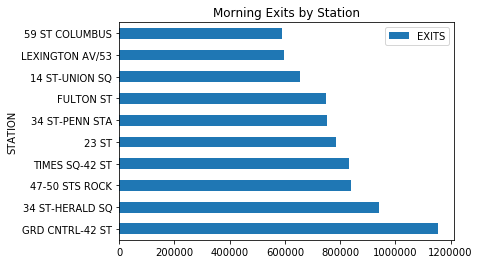

In [207]:
morning_month = morning_month.set_index('STATION')
topsts = morning_month.sort_values('EXITS', ascending=False).head(10)
topsts.head()
topsts.plot(kind='barh', title='Morning Exits by Station')

In [ ]:
## GRD CNTRL station
## 4 weeks
## daily entries

In [110]:
# at turnstile level
morning.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
DATETIME,,,,,,,,,,,,,,
2017-03-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,04:00:00,REGULAR,6095980,2065977,03/18/2017,2.066e+06,2.0
2017-03-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,08:00:00,REGULAR,6096012,2066004,03/18/2017,2.066e+06,27.0
2017-03-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/18/2017,12:00:00,REGULAR,6096165,2066103,03/18/2017,2.066e+06,99.0
2017-03-19 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2017,04:00:00,REGULAR,6097250,2066240,03/19/2017,2.066e+06,6.0
2017-03-19 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2017,08:00:00,REGULAR,6097260,2066259,03/19/2017,2.066e+06,19.0


In [ ]:
## GRD CNTRL station
## 1 weeks
## hourly entries